In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

# import gzip
# from cyvcf2 import VCF

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront'
home_dir = os.path.expanduser(home_dir)

# tools_path = f'{home_dir}/code/processing/tools/tools.py'
# sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
# import tools as tools

# atish_assay_path =f'2%5%_FitnessMeasurement/code/fitness_assay_grantedits.py'
# sys.path.append(os.path.dirname(os.path.expanduser(atish_assay_path)))
# import fitness_assay_grantedits as atish

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

import pickle 

with open(f'{home_dir}/data/intermediate/preexisting_mutations.pkl', 'rb') as f:
    preexisting_mutations = pickle.load(f)


sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

In [4]:

merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

kinsler_et_al_data = p.read_csv(f'{home_dir}/data/Kinsler_et_al_2020_fitnessdata.csv')

In [5]:



merged_fitness['Fit2D-2%_fitness']

0       1.128018
1       1.711155
2       1.207668
3       1.356385
4       1.088462
          ...   
5021    0.792491
5022    0.723868
5023    0.528693
5024    0.710487
5025    0.310373
Name: Fit2D-2%_fitness, Length: 4709, dtype: float64

In [22]:
genes = ['PDE2','GPB2','Diploid','IRA1']
gene_colors = ['orange','g','r','b']

levy_only = merged_fitness[merged_fitness['source_publication']=='Venkataram2015']

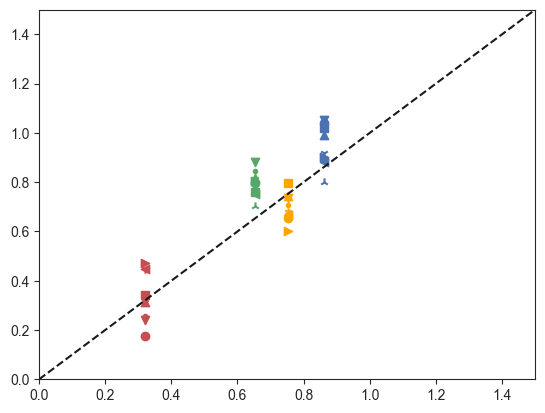

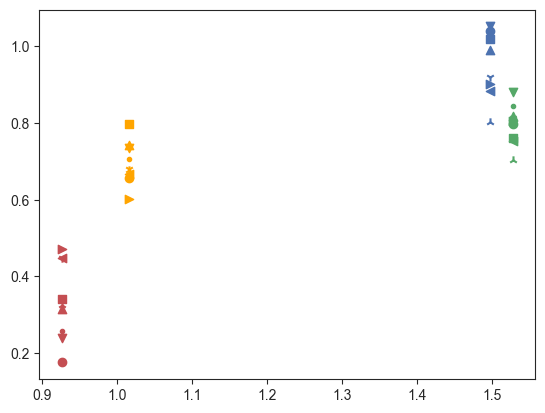

In [35]:
plt.figure()

markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11
]

m3_conditions = ['19','M3_Batch_3','M3_Batch_6','M3_Batch_13',
                 'M3_Batch_18','M3_Batch_20','M3_Batch_21','M3_Batch_23','1BB_M3']

for g,gene in enumerate(genes):
    
    for c,condition in enumerate(m3_conditions):

        plt.scatter(np.mean(levy_only[levy_only['gene']==gene]['Fit2D-2%_fitness']),
               np.mean(kinsler_et_al_data[kinsler_et_al_data['gene']==gene][f'{condition}_fitness']),
               color=gene_colors[g],marker=markers[c])
        
plt.xlim(0,1.5)
plt.ylim(0,1.5)

plt.plot([0,1.5],[0,1.5],'k--')

plt.figure()

for g,gene in enumerate(genes):
    
    for c,condition in enumerate(m3_conditions):

        plt.scatter(np.mean(levy_only[levy_only['gene']==gene]['Fit2D_early_fitness']),
               np.mean(kinsler_et_al_data[kinsler_et_al_data['gene']==gene][f'{condition}_fitness']),
               color=gene_colors[g],marker=markers[c])

# plt.xlim(0,1.5)
# plt.ylim(0,1.5)

# plt.plot([0,1.5],[0,1.5],'k--')

In [ ]:
kinsler_et_al_data['M3_Batch']